In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read csv file
customer_data = pd.read_csv("hw_1_customers.csv")

In [65]:
#Info of the Customer Dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [66]:
print(customer_data)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                

In [67]:
#take gender data
gender_data = pd.DataFrame(customer_data["Gender"])
#count Male & Female   #by caculate frequency of data multiple data length
count_Male = gender_data.value_counts(normalize=True)["Male"] * len(gender_data)
count_Female = gender_data.value_counts(normalize=True)["Female"] * len(gender_data)
print("Male: ",round(count_Male))
print("Female: ",round(count_Female))

#男女人數

Male:  814
Female:  1186


In [68]:
print("Unique values in the Profession column : ",len(customer_data["Profession"].unique()))
# Profession Counts
customer_data["Profession"].value_counts()

#各職業人數 

Unique values in the Profession column :  10


Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

Unique values in the Age column :  100


<AxesSubplot:xlabel='Age', ylabel='count'>

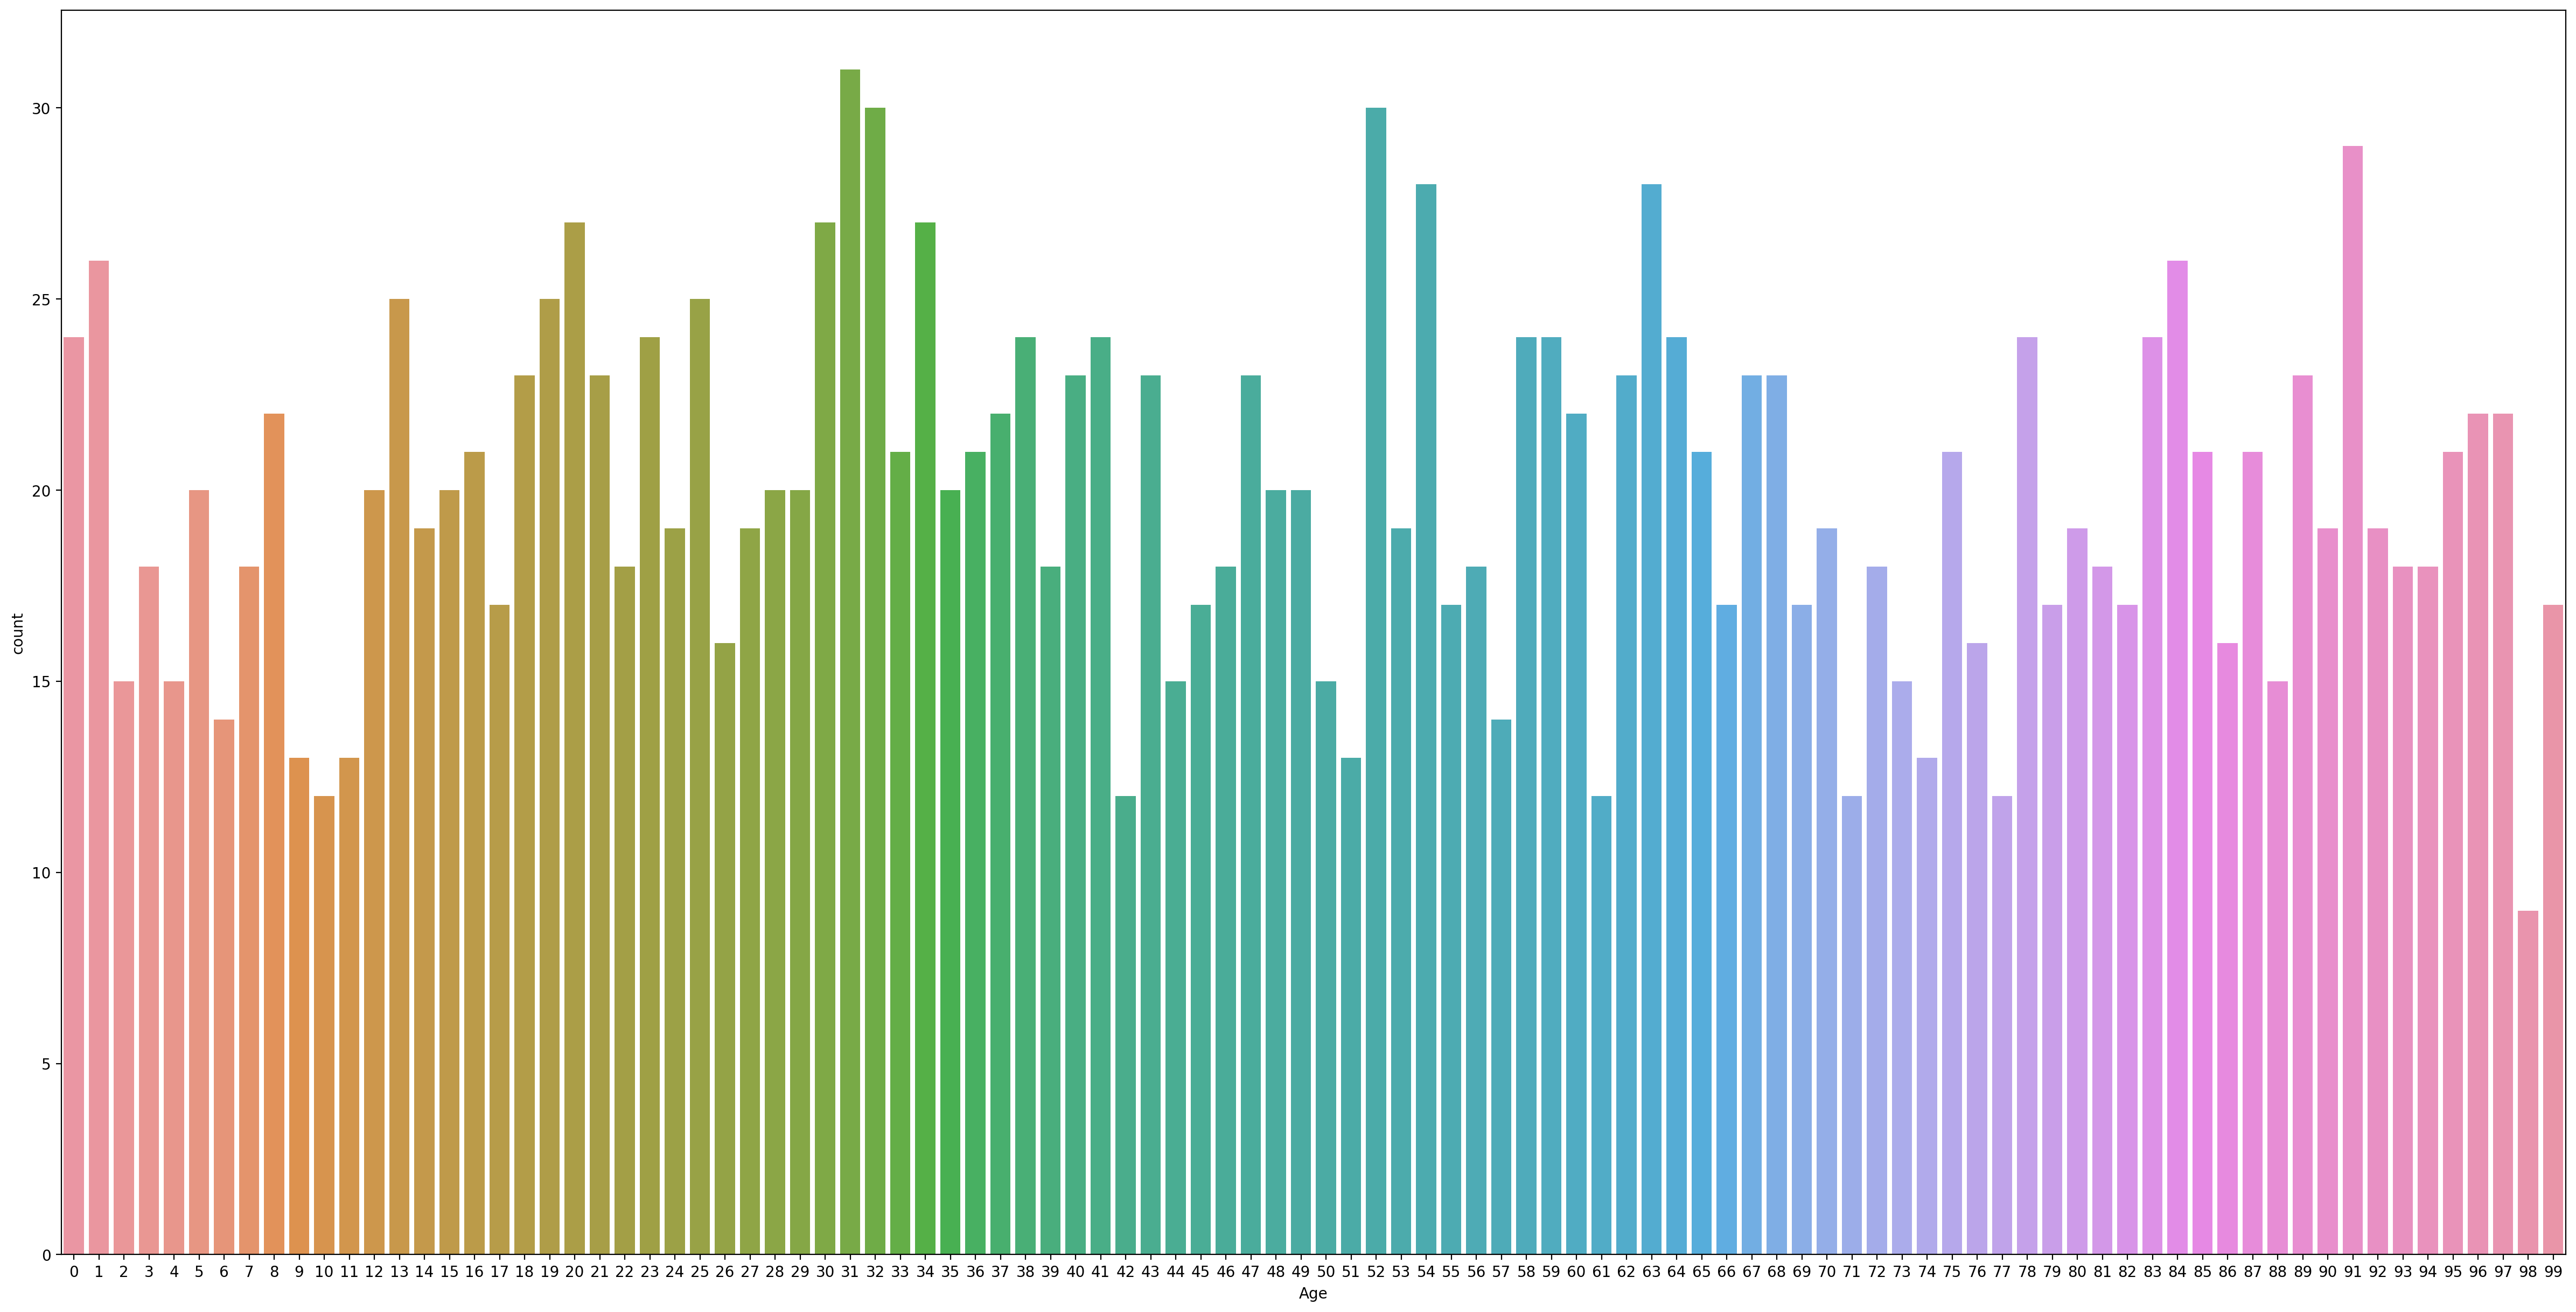

In [69]:
#unique value 非重複數據數量
print("Unique values in the Age column : ",len(customer_data["Age"].unique()))

#customer_data["Age"].value_counts()
# Count Plot based on the Age
plt.figure(figsize=(30,15),dpi=200)
sns.countplot(data = customer_data,x="Age")

#各年齡人數

<AxesSubplot:xlabel='Profession', ylabel='count'>

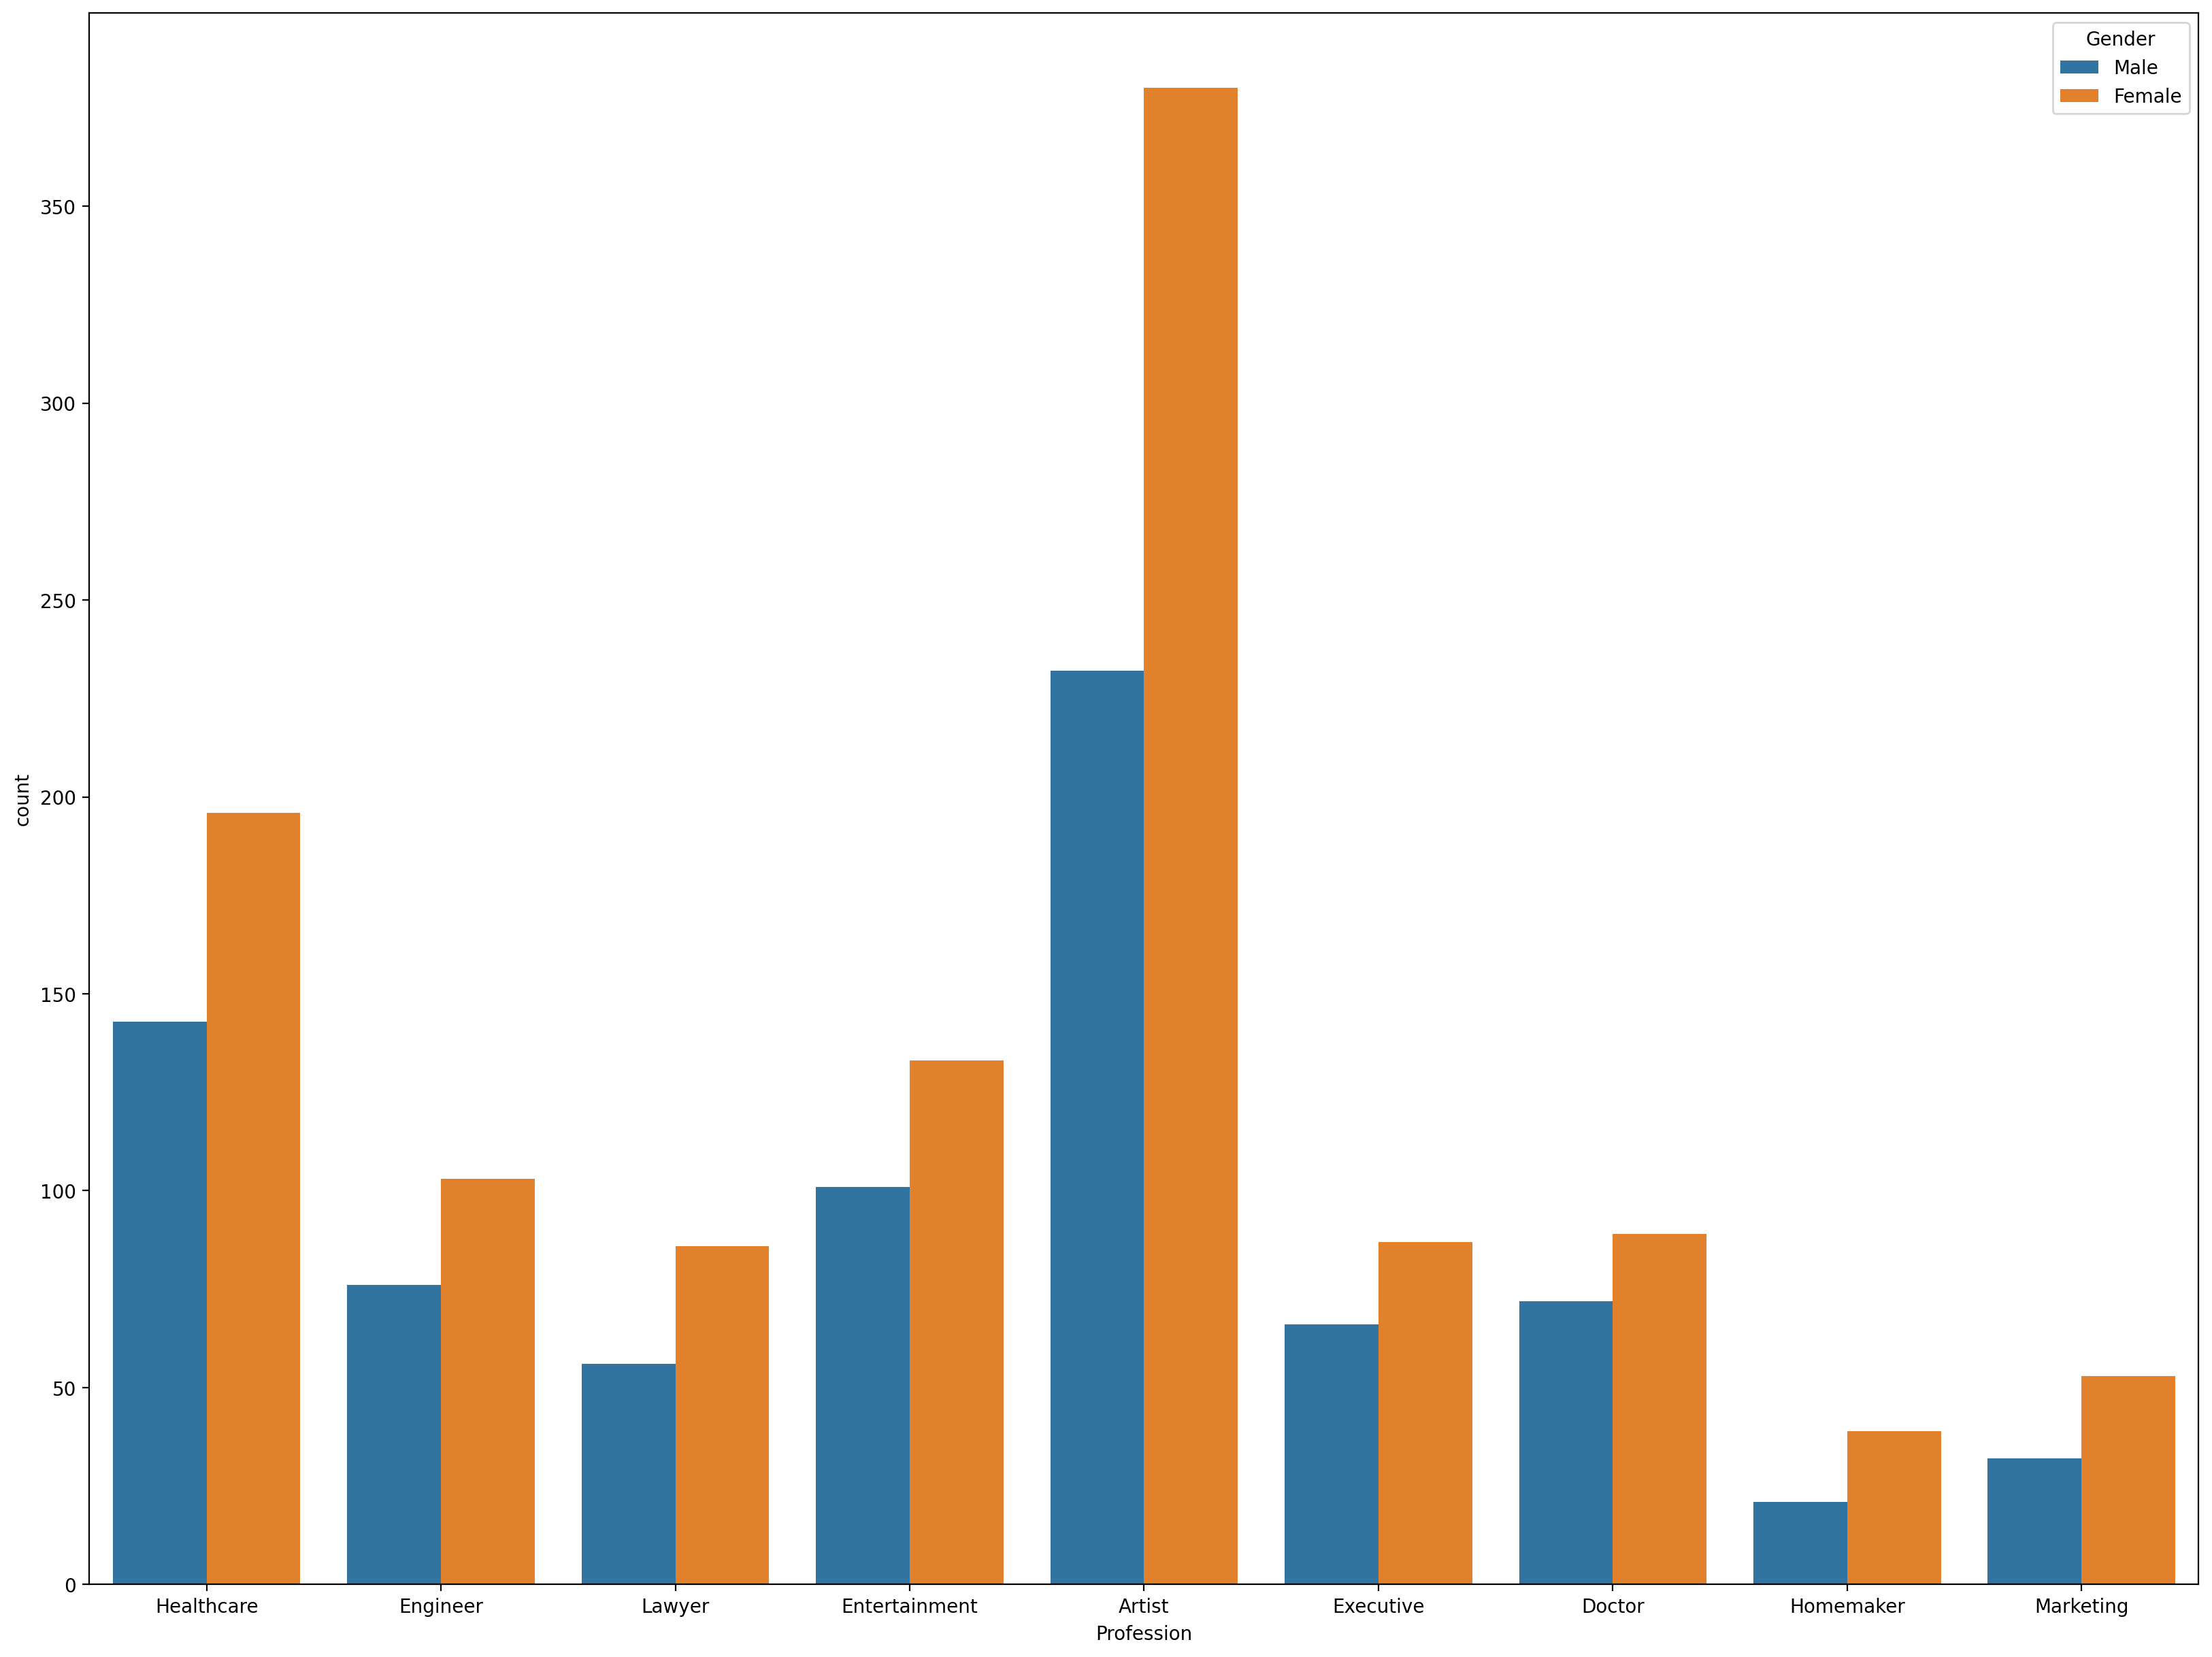

In [70]:
# Number of Male and Female Professions based on the field
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(data = customer_data,x="Profession",hue="Gender")

#性別 與 職業 人數比例關係

<AxesSubplot:xlabel='Age', ylabel='count'>

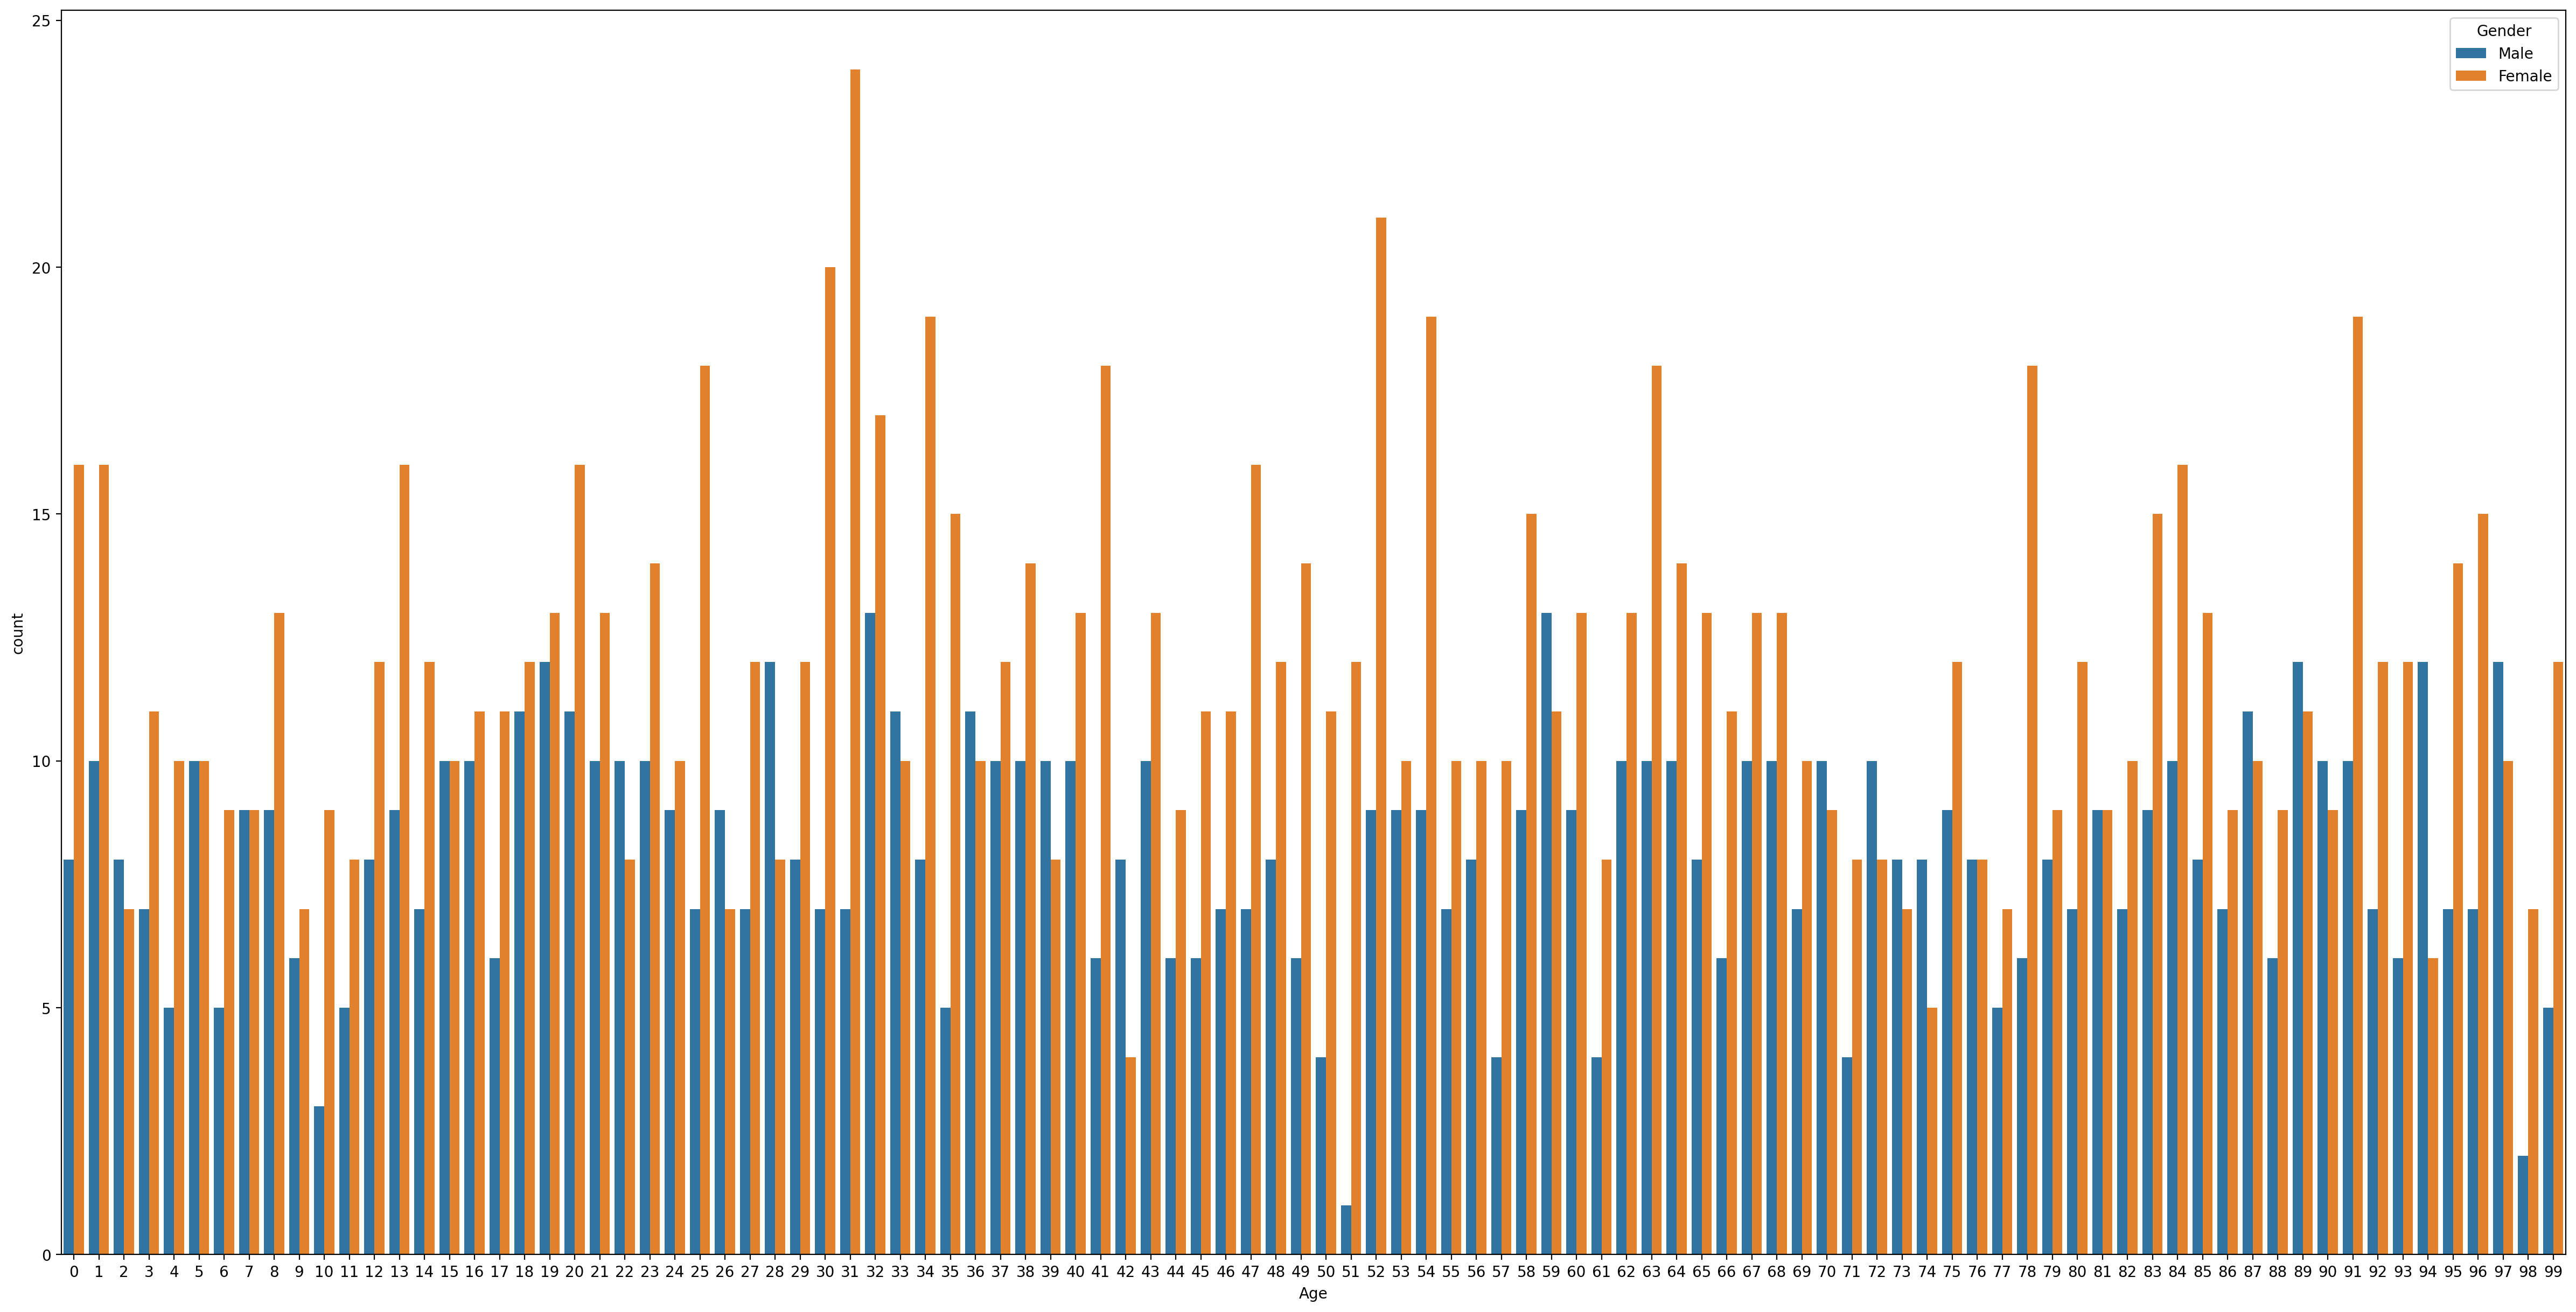

In [71]:
# Number of Male and Female Age based on the field
plt.figure(figsize=(30,15),dpi=200)
sns.countplot(data = customer_data,x="Age",hue="Gender")

#性別 與 年齡 比例關係圖

In [72]:
#group by Profession
group_Profession = customer_data.groupby('Profession')

#count the minimum, average and maximum Income of every Prefession
Income_result = group_Profession['Annual Income ($)'].agg(['min','mean','max'])
print("Profession Minimum, Average and Maximum Income :\n", round(Income_result))

#職業 薪資 數據

Profession Minimum, Average and Maximum Income :
                  min      mean     max
Profession                            
Artist             0  108777.0  189709
Doctor             0  111573.0  189672
Engineer        7000  111161.0  189974
Entertainment   1000  110650.0  186882
Executive       4000  113770.0  189630
Healthcare      3000  112574.0  189689
Homemaker      29000  108759.0  188696
Lawyer          3000  110996.0  189650
Marketing       5000  107994.0  186069


Profession - Income data:
                  min      mean     max
Profession                            
Artist             0  108777.0  189709
Doctor             0  111573.0  189672
Engineer        7000  111161.0  189974
Entertainment   1000  110650.0  186882
Executive       4000  113770.0  189630
Healthcare      3000  112574.0  189689
Homemaker      29000  108759.0  188696
Lawyer          3000  110996.0  189650
Marketing       5000  107994.0  186069
Profession - Spending Score data:
                min  mean  max
Profession                   
Artist           1  53.0  100
Doctor           1  52.0  100
Engineer         0  49.0   99
Entertainment    1  53.0  100
Executive        1  50.0   98
Healthcare       1  51.0  100
Homemaker        2  46.0  100
Lawyer           1  49.0  100
Marketing        1  49.0  100


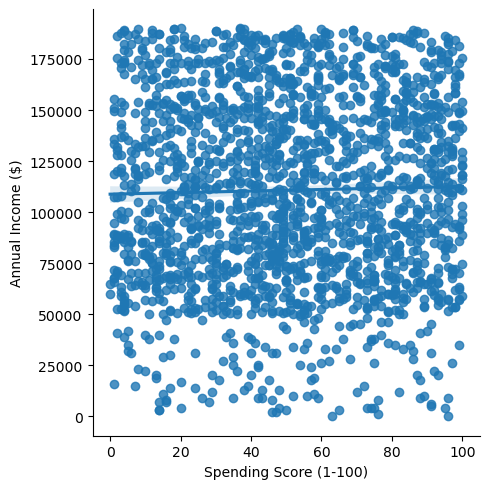

In [73]:
#count the minimum, average and maximum Spending Score of every Prefession
Income_result_Spend = group_Profession['Spending Score (1-100)'].agg(['min','mean','max'])

print("Profession - Income data:\n", round(Income_result))
print("Profession - Spending Score data:\n", round(Income_result_Spend))

sns.lmplot(x='Spending Score (1-100)', y='Annual Income ($)', data=customer_data)
#職業 薪資與消費 關係

Unique values in the Spending Score column :  101


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

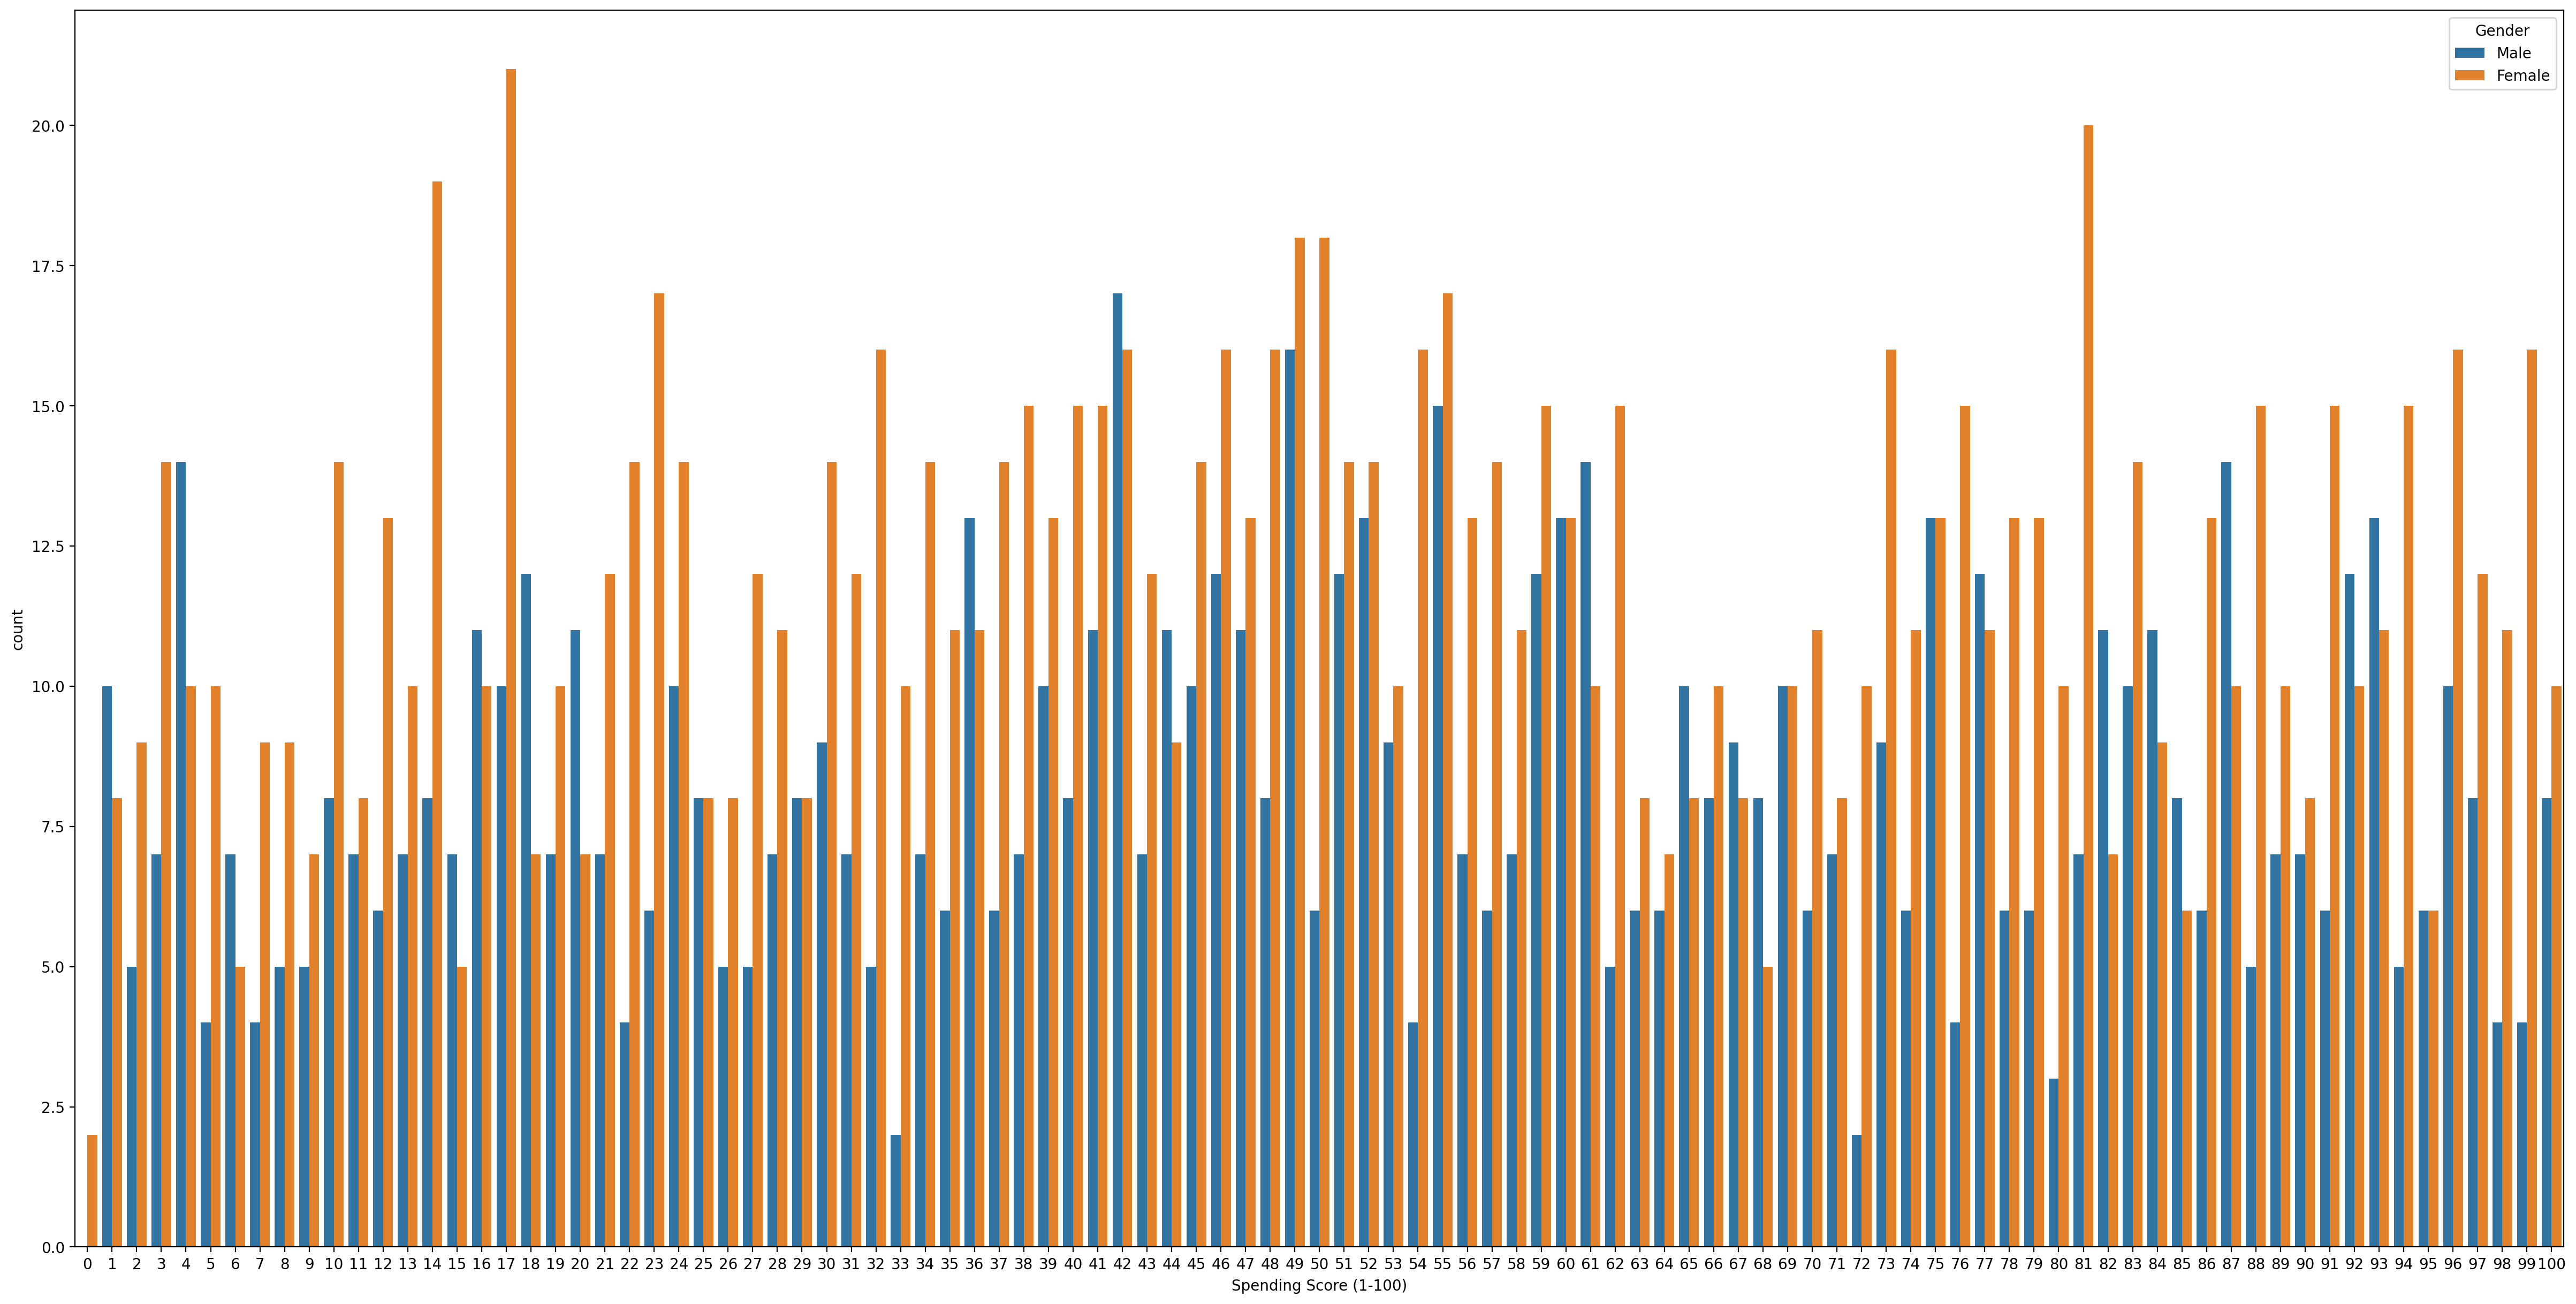

In [74]:
# Spending Score based on the Male and Female Count
print("Unique values in the Spending Score column : ",len(customer_data["Spending Score (1-100)"].unique()))

plt.figure(figsize=(30,15),dpi=200)
sns.countplot(data = customer_data,x="Spending Score (1-100)",hue="Gender")

#性別 與 消費 關係圖

In [79]:
#count the minimum, average and maximum Family Size of every Prefession
Income_result_FamiSize = group_Profession['Family Size'].agg(['min','max','median','mean','std','var'])

print("Profession - Family Size data :\n", round(Income_result_FamiSize))

#職業 家庭規模 數據

Profession - Family Size data :
                min  max  median  mean  std  var
Profession                                     
Artist           1    8     3.0   4.0  2.0  4.0
Doctor           1    7     3.0   4.0  2.0  4.0
Engineer         1    8     4.0   4.0  2.0  4.0
Entertainment    1    7     4.0   4.0  2.0  4.0
Executive        1    7     4.0   4.0  2.0  3.0
Healthcare       1    8     4.0   4.0  2.0  4.0
Homemaker        1    7     4.0   4.0  2.0  5.0
Lawyer           1    9     3.0   4.0  2.0  4.0
Marketing        1    7     3.0   4.0  2.0  4.0


In [62]:
#count the minimum, average and maximum Family Size of every Prefession
Income_result_WorkExperience = group_Profession['Work Experience'].agg(['min','max','median','mean','std','var'])

print("Profession - Work Experience data :\n", round(Income_result_WorkExperience))

#職業 工作經驗 數據

Profession - Work Experience data :
                min  max  median  mean  std   var
Profession                                      
Artist           0   17     4.0   4.0  4.0  16.0
Doctor           0   16     2.0   4.0  4.0  19.0
Engineer         0   16     3.0   4.0  4.0  14.0
Entertainment    0   15     1.0   4.0  4.0  14.0
Executive        0   16     4.0   4.0  4.0  16.0
Healthcare       0   16     3.0   4.0  4.0  14.0
Homemaker        0   14     7.0   6.0  4.0  12.0
Lawyer           0   17     1.0   4.0  4.0  15.0
Marketing        0   15     2.0   4.0  4.0  17.0


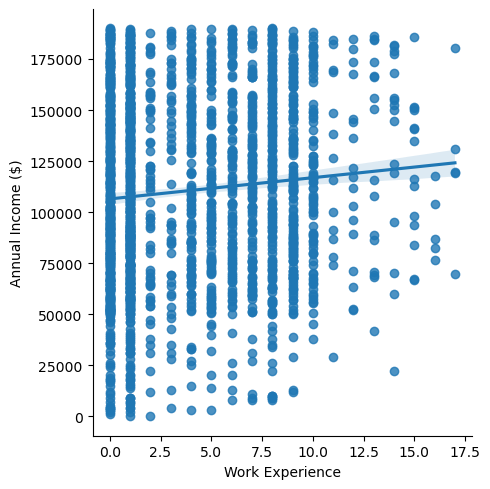

In [80]:
sns.lmplot(x='Work Experience', y='Annual Income ($)', data=customer_data)

#工作經驗與薪資 關係圖

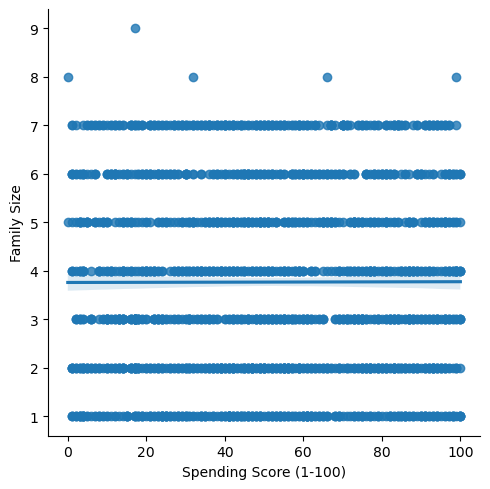

In [83]:
sns.lmplot(x='Spending Score (1-100)', y='Family Size', data=customer_data)

#家庭規模與消費 關係圖